<a href="https://colab.research.google.com/github/pbeles/pbeles-NLP_project_j/blob/main/NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INITIAL MODEL

INITIAL MODEL+STOPWORDS FROM NLTK+EXTRA VISUALIZATION

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Count Vectorizer Accuracy: 0.9417362026057678
Classification Report (Count Vectorizer):
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      3529
           1       0.94      0.94      0.94      3302

    accuracy                           0.94      6831
   macro avg       0.94      0.94      0.94      6831
weighted avg       0.94      0.94      0.94      6831

Precision: 0.9434941967012829
Recall: 0.9354936402180497
F1 Score: 0.9394768856447688


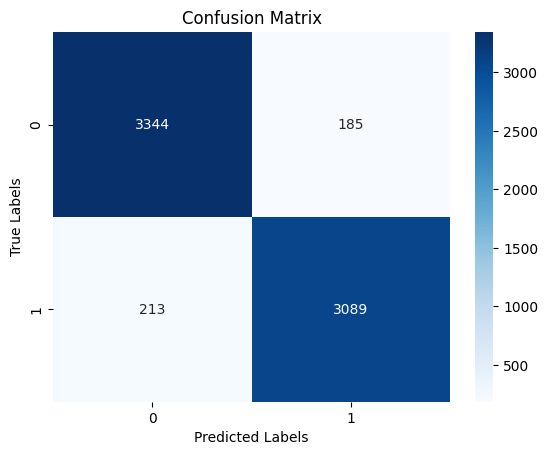

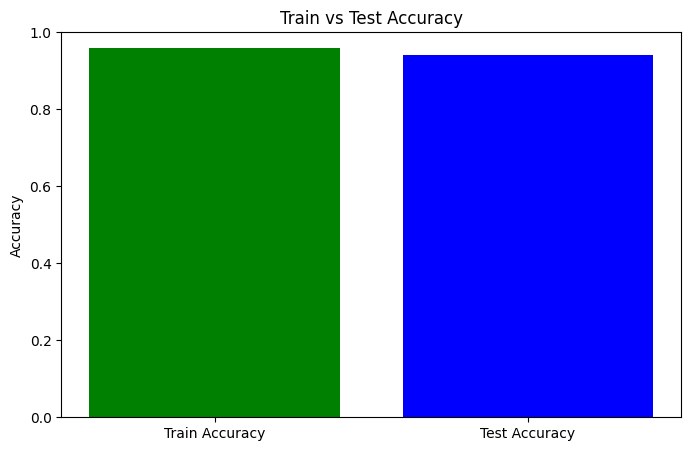

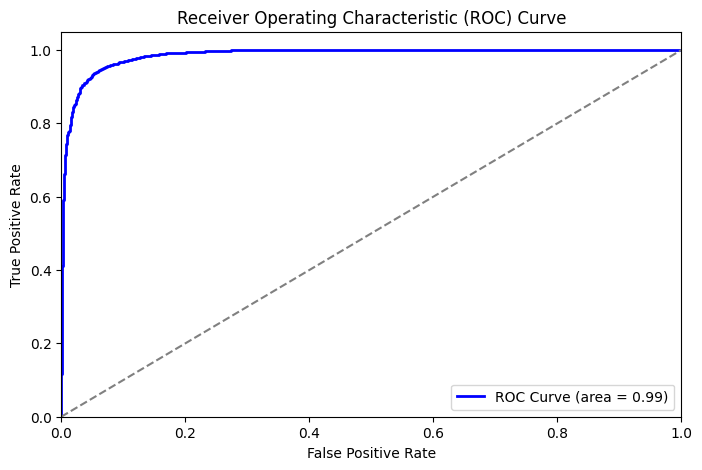

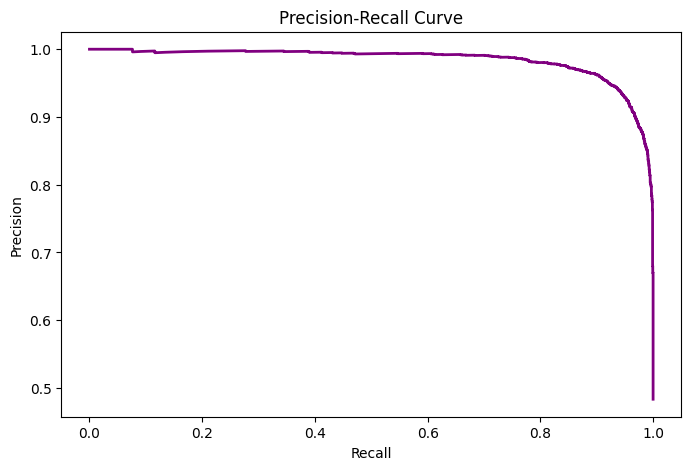

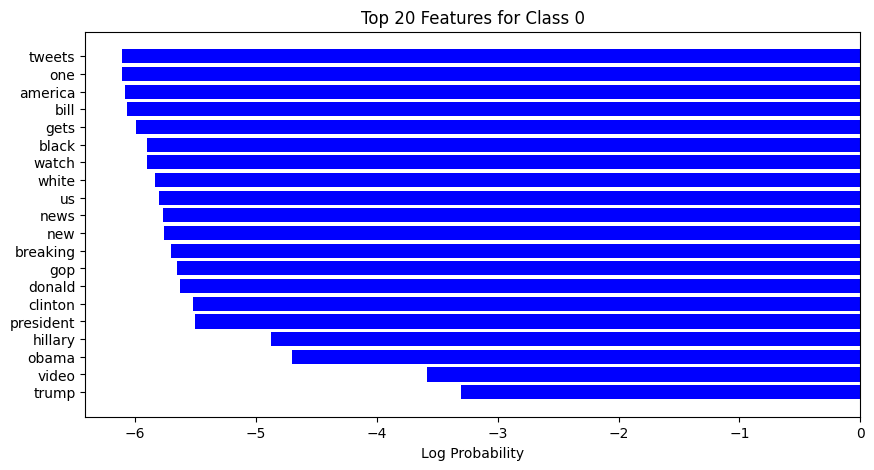

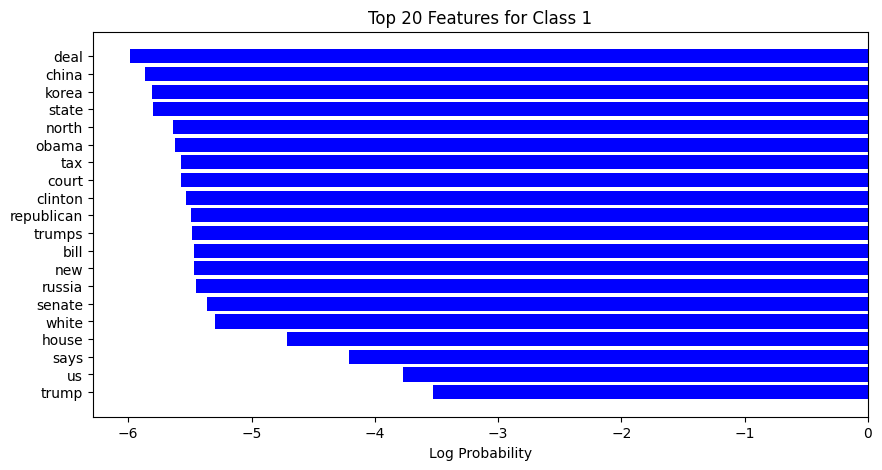

In [ ]:
import pandas as pd
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import precision_recall_curve
import numpy as np

# Load dataset
file_path = '/content/training_data_lowercase.csv'
data = pd.read_csv(file_path, delimiter='\t', header=None, names=['label', 'text'])

# Train-test split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Data Preprocessing
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove single characters
    text = re.sub(r'\b[a-zA-Z]\b', '', text)
    # Substitute multiple spaces with single space
    text = re.sub(r'\s+', ' ', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Define stopwords using NLTK
def define_stopwords():
    nltk.download('stopwords')
    from nltk.corpus import stopwords
    return set(stopwords.words('english'))

stop_words = define_stopwords()

# Remove stopwords function
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

# Lemmatize text (placeholder function)
def lemmatize_text(text):
    return ' '.join([word for word in text.split()])  # This will keep the words unchanged

# Apply preprocessing, stopword removal, and lemmatization
train_data['processed_text'] = train_data['text'].apply(preprocess_text)
test_data['processed_text'] = test_data['text'].apply(preprocess_text)

train_data['processed_text'] = train_data['processed_text'].apply(remove_stopwords)
test_data['processed_text'] = test_data['processed_text'].apply(remove_stopwords)

train_data['processed_text'] = train_data['processed_text'].apply(lemmatize_text)
test_data['processed_text'] = test_data['processed_text'].apply(lemmatize_text)

# Feature Representation - Count Vectorizer
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(train_data['processed_text'])
X_test_count = count_vectorizer.transform(test_data['processed_text'])

# Train the classifier
classifier = MultinomialNB()
classifier.fit(X_train_count, train_data['label'])

# Predict and evaluate
y_pred_count = classifier.predict(X_test_count)
count_accuracy = accuracy_score(test_data['label'], y_pred_count)
print("Count Vectorizer Accuracy:", count_accuracy)
print("Classification Report (Count Vectorizer):\n", classification_report(test_data['label'], y_pred_count))

# Additional evaluation metrics
precision = precision_score(test_data['label'], y_pred_count, average='binary')
recall = recall_score(test_data['label'], y_pred_count, average='binary')
f1 = f1_score(test_data['label'], y_pred_count, average='binary')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plotting Confusion Matrix
conf_matrix = confusion_matrix(test_data['label'], y_pred_count)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plotting train vs test accuracy
train_pred_count = classifier.predict(X_train_count)
train_accuracy = accuracy_score(train_data['label'], train_pred_count)

# Bar plot to compare train and test accuracy
plt.figure(figsize=(8, 5))
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, count_accuracy], color=['green', 'blue'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
plt.show()

# Plotting ROC Curve
# Calculate probabilities and ROC AUC for test set
y_prob_count = classifier.predict_proba(X_test_count)[:, 1]
fpr, tpr, _ = roc_curve(test_data['label'], y_prob_count, pos_label=classifier.classes_[1])
roc_auc = roc_auc_score(test_data['label'], y_prob_count)

# Plot ROC Curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plotting Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(test_data['label'], y_prob_count)

plt.figure(figsize=(8, 5))
plt.plot(recall_vals, precision_vals, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Plotting Top Features
def plot_top_features(vectorizer, classifier, n=20):
    feature_names = vectorizer.get_feature_names_out()
    class_labels = classifier.classes_
    for i, class_label in enumerate(class_labels):
        top_features_idx = classifier.feature_log_prob_[i].argsort()[-n:]
        top_features = [feature_names[j] for j in top_features_idx]
        top_scores = [classifier.feature_log_prob_[i][j] for j in top_features_idx]
        plt.figure(figsize=(10, 5))
        plt.barh(top_features, top_scores, color='blue')
        plt.xlabel('Log Probability')
        plt.title(f'Top {n} Features for Class {class_label}')
        plt.gca().invert_yaxis()
        plt.show()

# Visualize Top Features for Each Class
plot_top_features(count_vectorizer, classifier)


In [ ]:
import pandas as pd
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, roc_auc_score, precision_recall_curve
import numpy as np

# Load dataset
file_path = '/content/training_data_lowercase.csv'
data = pd.read_csv(file_path, delimiter='\t', header=None, names=['label', 'text'])

# Train-test split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Data Preprocessing
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove single characters
    text = re.sub(r'\b[a-zA-Z]\b', '', text)
    # Substitute multiple spaces with single space
    text = re.sub(r'\s+', ' ', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Define stopwords using NLTK
def define_stopwords():
    nltk.download('stopwords')
    from nltk.corpus import stopwords
    return set(stopwords.words('english'))

stop_words = define_stopwords()

# Remove stopwords function
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

# Lemmatize text (placeholder function)
def lemmatize_text(text):
    return ' '.join([word for word in text.split()])  # This will keep the words unchanged

# Apply preprocessing, stopword removal, and lemmatization
train_data['processed_text'] = train_data['text'].apply(preprocess_text)
test_data['processed_text'] = test_data['text'].apply(preprocess_text)

train_data['processed_text'] = train_data['processed_text'].apply(remove_stopwords)
test_data['processed_text'] = test_data['processed_text'].apply(remove_stopwords)

train_data['processed_text'] = train_data['processed_text'].apply(lemmatize_text)
test_data['processed_text'] = test_data['processed_text'].apply(lemmatize_text)

# Feature Representation - TF-IDF Vectorizer with n-grams
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['processed_text'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['processed_text'])

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, train_data['label'])

# Predict and evaluate for Naive Bayes
y_pred_nb = nb_classifier.predict(X_test_tfidf)
nb_accuracy = accuracy_score(test_data['label'], y_pred_nb)
print("TF-IDF (Naive Bayes) Accuracy:", nb_accuracy)
print("Classification Report (Naive Bayes with TF-IDF):\n", classification_report(test_data['label'], y_pred_nb))

# Train the Logistic Regression classifier
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train_tfidf, train_data['label'])
y_pred_lr = lr_classifier.predict(X_test_tfidf)
lr_accuracy = accuracy_score(test_data['label'], y_pred_lr)
print("TF-IDF (Logistic Regression) Accuracy:", lr_accuracy)
print("Classification Report (Logistic Regression with TF-IDF):\n", classification_report(test_data['label'], y_pred_lr))

# Train the SVM classifier
svm_classifier = SVC(probability=True)
svm_classifier.fit(X_train_tfidf, train_data['label'])
y_pred_svm = svm_classifier.predict(X_test_tfidf)
svm_accuracy = accuracy_score(test_data['label'], y_pred_svm)
print("TF-IDF (SVM) Accuracy:", svm_accuracy)
print("Classification Report (SVM with TF-IDF):\n", classification_report(test_data['label'], y_pred_svm))

# Compare Train vs Test Accuracy for Naive Bayes
train_pred_nb = nb_classifier.predict(X_train_tfidf)
train_accuracy_nb = accuracy_score(train_data['label'], train_pred_nb)

# Bar plot to compare train and test accuracy for Naive Bayes
plt.figure(figsize=(8, 5))
plt.bar(['Train Accuracy (NB)', 'Test Accuracy (NB)'], [train_accuracy_nb, nb_accuracy], color=['green', 'blue'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy for Naive Bayes')
plt.show()

# Plotting ROC Curve for Naive Bayes
y_prob_nb = nb_classifier.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, _ = roc_curve(test_data['label'], y_prob_nb, pos_label=nb_classifier.classes_[1])
roc_auc = roc_auc_score(test_data['label'], y_prob_nb)

# Plot ROC Curve for Naive Bayes
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.show()

# Plotting Precision-Recall Curve for Naive Bayes
precision_vals, recall_vals, _ = precision_recall_curve(test_data['label'], y_prob_nb)

plt.figure(figsize=(8, 5))
plt.plot(recall_vals, precision_vals, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Naive Bayes')
plt.show()

# Plotting Top Features for Naive Bayes
def plot_top_features(vectorizer, classifier, n=20):
    feature_names = vectorizer.get_feature_names_out()
    class_labels = classifier.classes_
    for i, class_label in enumerate(class_labels):
        top_features_idx = classifier.feature_log_prob_[i].argsort()[-n:]
        top_features = [feature_names[j] for j in top_features_idx]
        top_scores = [classifier.feature_log_prob_[i][j] for j in top_features_idx]
        plt.figure(figsize=(10, 5))
        plt.barh(top_features, top_scores, color='blue')
        plt.xlabel('Log Probability')
        plt.title(f'Top {n} Features for Class {class_label}')
        plt.gca().invert_yaxis()
        plt.show()

# Visualize Top Features for Naive Bayes
plot_top_features(tfidf_vectorizer, nb_classifier)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


TF-IDF (Naive Bayes) Accuracy: 0.9434929000146391
Classification Report (Naive Bayes with TF-IDF):
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      3529
           1       0.95      0.93      0.94      3302

    accuracy                           0.94      6831
   macro avg       0.94      0.94      0.94      6831
weighted avg       0.94      0.94      0.94      6831

TF-IDF (Logistic Regression) Accuracy: 0.9329527155614112
Classification Report (Logistic Regression with TF-IDF):
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      3529
           1       0.93      0.93      0.93      3302

    accuracy                           0.93      6831
   macro avg       0.93      0.93      0.93      6831
weighted avg       0.93      0.93      0.93      6831



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
Prediction 1835: Label 1
Prediction 1836: Label 0
Prediction 1837: Label 0
Prediction 1838: Label 0
Prediction 1839: Label 1
Prediction 1840: Label 0
Prediction 1841: Label 0
Prediction 1842: Label 1
Prediction 1843: Label 0
Prediction 1844: Label 0
Prediction 1845: Label 0
Prediction 1846: Label 1
Prediction 1847: Label 1
Prediction 1848: Label 1
Prediction 1849: Label 0
Prediction 1850: Label 0
Prediction 1851: Label 1
Prediction 1852: Label 0
Prediction 1853: Label 0
Prediction 1854: Label 0
Prediction 1855: Label 0
Prediction 1856: Label 0
Prediction 1857: Label 0
Prediction 1858: Label 0
Prediction 1859: Label 1
Prediction 1860: Label 1
Prediction 1861: Label 0
Prediction 1862: Label 1
Prediction 1863: Label 0
Prediction 1864: Label 0
Prediction 1865: Label 1
Prediction 1866: Label 1
Prediction 1867: Label 0
Prediction 1868: Label 0
Prediction 1869: Label 0
Prediction 1870: Label 1
Prediction 1871: Label 1
Predicti

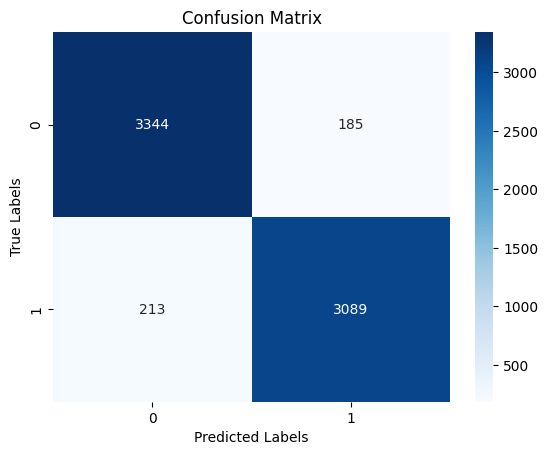

Train Accuracy: 0.9580908458694777
Test Accuracy: 0.9417362026057678


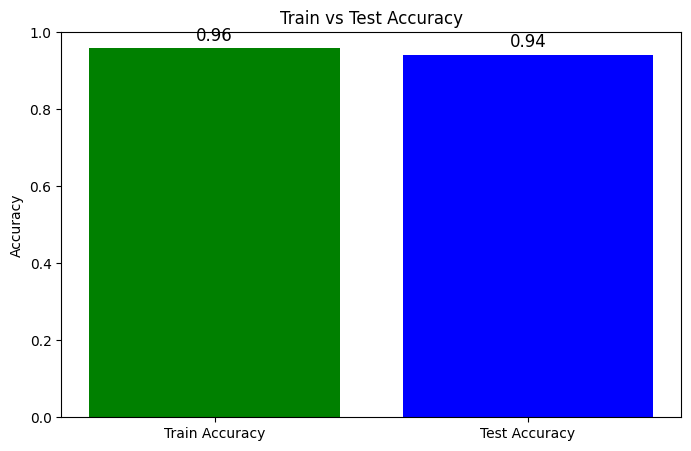

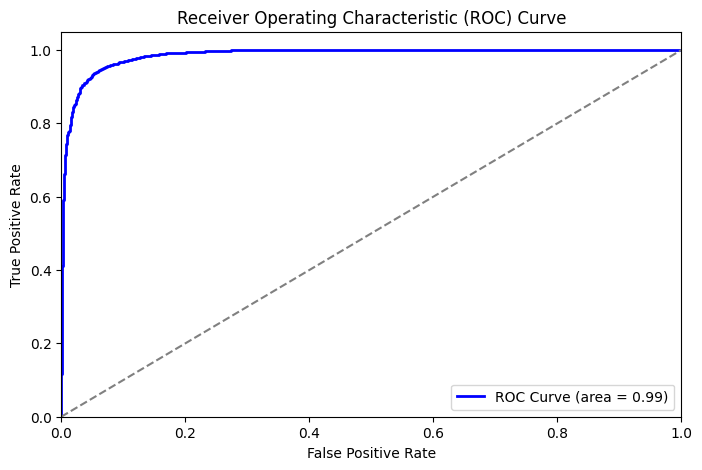

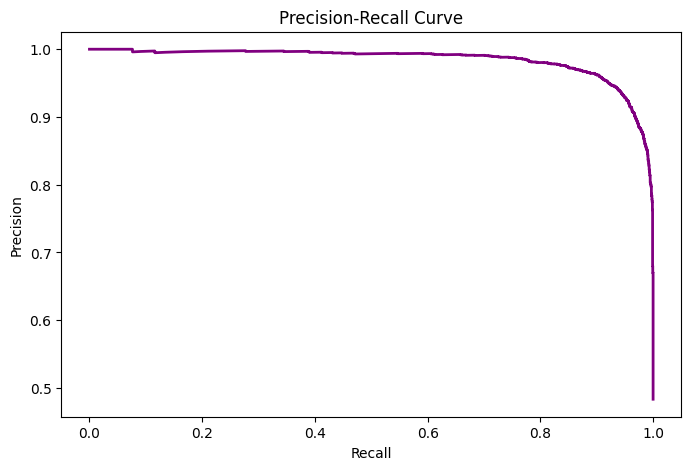

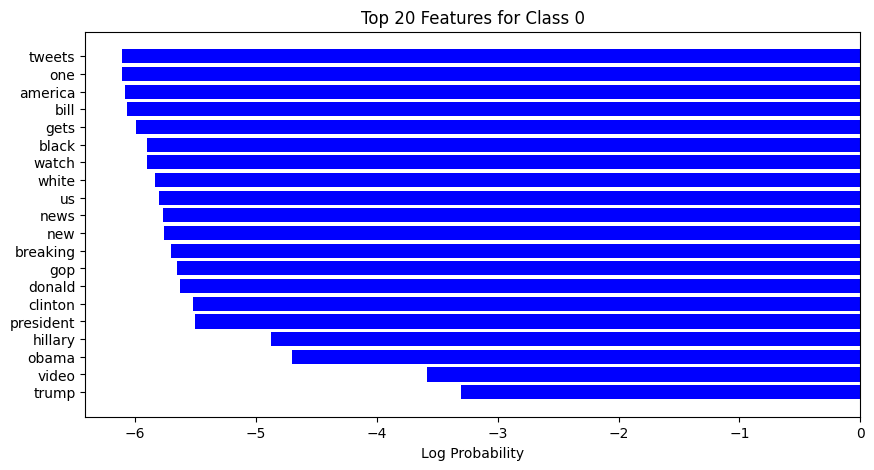

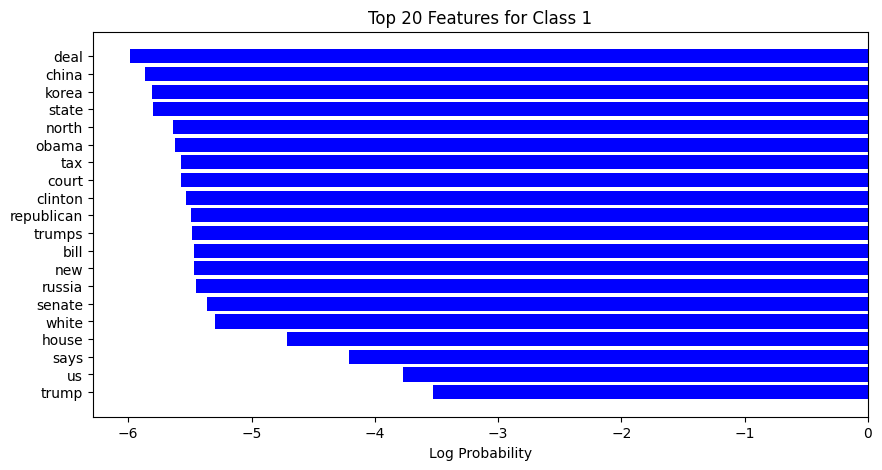

In [5]:
import pandas as pd
import re
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, roc_auc_score, precision_recall_curve
import numpy as np

# Load dataset
file_path = '/content/training_data_lowercase.csv'
data = pd.read_csv(file_path, delimiter='\t', header=None, names=['label', 'text'])

# Train-test split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Data Preprocessing
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove single characters
    text = re.sub(r'\b[a-zA-Z]\b', '', text)
    # Substitute multiple spaces with single space
    text = re.sub(r'\s+', ' ', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Define stopwords using NLTK
def define_stopwords():
    nltk.download('stopwords')
    from nltk.corpus import stopwords
    return set(stopwords.words('english'))

stop_words = define_stopwords()

# Remove stopwords function
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

# Lemmatize text (placeholder function)
def lemmatize_text(text):
    return ' '.join([word for word in text.split()])  # This will keep the words unchanged

# Apply preprocessing, stopword removal, and lemmatization
train_data['processed_text'] = train_data['text'].apply(preprocess_text)
test_data['processed_text'] = test_data['text'].apply(preprocess_text)

train_data['processed_text'] = train_data['processed_text'].apply(remove_stopwords)
test_data['processed_text'] = test_data['processed_text'].apply(remove_stopwords)

train_data['processed_text'] = train_data['processed_text'].apply(lemmatize_text)
test_data['processed_text'] = test_data['processed_text'].apply(lemmatize_text)

# Feature Representation - Count Vectorizer
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(train_data['processed_text'])
X_test_count = count_vectorizer.transform(test_data['processed_text'])

# Train the classifier
classifier = MultinomialNB()
classifier.fit(X_train_count, train_data['label'])

# Predict and evaluate
y_pred_count = classifier.predict(X_test_count)
count_accuracy = accuracy_score(test_data['label'], y_pred_count)
print("Count Vectorizer Accuracy:", count_accuracy)
print("Classification Report (Count Vectorizer):\n", classification_report(test_data['label'], y_pred_count))
for i, prediction in enumerate(y_pred_count):
    label = "Label 1" if prediction == 1 else "Label 0"
    print(f"Prediction {i+1}: {label}")

# Additional evaluation metrics
precision = precision_score(test_data['label'], y_pred_count, average='binary')
recall = recall_score(test_data['label'], y_pred_count, average='binary')
f1 = f1_score(test_data['label'], y_pred_count, average='binary')
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plotting Confusion Matrix
conf_matrix = confusion_matrix(test_data['label'], y_pred_count)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plotting train vs test accuracy
train_pred_count = classifier.predict(X_train_count)
train_accuracy = accuracy_score(train_data['label'], train_pred_count)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", count_accuracy)

# Bar plot to compare train and test accuracy
plt.figure(figsize=(8, 5))
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, count_accuracy], color=['green', 'blue'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy')
for i, v in enumerate([train_accuracy, count_accuracy]):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)
plt.show()

# Plotting ROC Curve
# Calculate probabilities and ROC AUC for test set
y_prob_count = classifier.predict_proba(X_test_count)[:, 1]
fpr, tpr, _ = roc_curve(test_data['label'], y_prob_count, pos_label=classifier.classes_[1])
roc_auc = roc_auc_score(test_data['label'], y_prob_count)

# Plot ROC Curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plotting Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(test_data['label'], y_prob_count)

plt.figure(figsize=(8, 5))
plt.plot(recall_vals, precision_vals, color='purple', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Plotting Top Features
def plot_top_features(vectorizer, classifier, n=20):
    feature_names = vectorizer.get_feature_names_out()
    class_labels = classifier.classes_
    for i, class_label in enumerate(class_labels):
        top_features_idx = classifier.feature_log_prob_[i].argsort()[-n:]
        top_features = [feature_names[j] for j in top_features_idx]
        top_scores = [classifier.feature_log_prob_[i][j] for j in top_features_idx]
        plt.figure(figsize=(10, 5))
        plt.barh(top_features, top_scores, color='blue')
        plt.xlabel('Log Probability')
        plt.title(f'Top {n} Features for Class {class_label}')
        plt.gca().invert_yaxis()
        plt.show()

# Visualize Top Features for Each Class
plot_top_features(count_vectorizer, classifier)